In [3]:
from deepmol.loaders import CSVLoader
import pandas as pd
import numpy as np

# Load data from CSV file
loader = CSVLoader(dataset_path='amostras_30000.csv',
                   smiles_field='smiles',
                   id_field='ids',
                   mode='auto', shard_size=1000)
# create the dataset
csv_dataset = loader.create_dataset(sep=',', header=0)

/home/jcapela/miniconda3/envs/deepmol/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

df = pd.read_csv("integrated_dataset.csv")
amostras = df.sample(n=30000, random_state=42)


In [3]:
amostras.to_csv("amostras_30000.csv", index=False)


# NP Classifier


In [7]:
from deepmol.compound_featurization import NPClassifierFP

NPClassifierFP(n_jobs=10).featurize(csv_dataset, inplace=True)

NPClassifierFP: 100%|██████████| 1000/1000 [00:02<00:00, 333.51it/s]


In [5]:
csv_dataset.X.shape

(30000, 6144)

In [6]:
csv_dataset.X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4., 36., 42., 50.]),
 array([6111,   10,   11,    8,    1,    1,    1,    1]))

# Biosynfoni

In [8]:
from deepmol.compound_featurization import BiosynfoniKeys

BiosynfoniKeys(n_jobs=10).featurize(csv_dataset, inplace=True)

BiosynfoniKeys: 100%|██████████| 1000/1000 [00:02<00:00, 352.92it/s]


In [9]:
csv_dataset.X.shape

(30000, 39)

In [10]:
csv_dataset.X[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1., 10.,  5., 55.,  4.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [11]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([ 0.,  1.,  4.,  5., 10., 55.]), array([34,  1,  1,  1,  1,  1]))

# Neural NPFP

In [12]:
from deepmol.compound_featurization import NeuralNPFP

NeuralNPFP(n_jobs=10).featurize(csv_dataset, inplace=True)

/home/ppereira/miniforge3/envs/Project/lib/python3.11/site-packages/deepmol/compound_featurization/neural_npfp_generator.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
 

In [13]:
csv_dataset.X.shape

(30000, 64)

In [14]:
csv_dataset.X[0]

array([ 1.82657611, -0.14013769, -1.78766513,  1.81063437, -2.32493448,
       -2.39600992,  1.84732926,  2.36158395, -1.78433383, -0.46329024,
        2.15387702, -0.40001643, -1.59564078, -2.06041574,  1.44741619,
       -2.21173239, -0.61478484,  1.85280526,  0.45151985, -1.71923113,
       -2.32591343, -2.22309494, -2.22470307,  1.64728463, -1.65957129,
       -1.75095212, -2.07849526,  1.21179235,  2.7078526 , -1.06124187,
        2.59967804, -1.30787718,  1.64624715, -2.55019975,  2.57820582,
       -2.15027928, -1.2620945 , -0.98375863,  0.73135829,  1.08484197,
        2.8657856 , -2.6965363 ,  1.04068708,  1.42691851,  1.0653019 ,
        1.80034328, -0.1244522 , -1.30602562,  1.14200723,  1.62013364,
       -1.81430066,  1.48497033, -1.31255066,  1.84707391,  2.05637836,
        0.90538549,  0.05679986, -2.15124702, -1.85069108, -1.70023704,
       -2.08359456,  1.49881494, -2.43924689,  1.41526985])

In [15]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([-2.6965363 , -2.55019975, -2.43924689, -2.39600992, -2.32591343,
        -2.32493448, -2.22470307, -2.22309494, -2.21173239, -2.15124702,
        -2.15027928, -2.08359456, -2.07849526, -2.06041574, -1.85069108,
        -1.81430066, -1.78766513, -1.78433383, -1.75095212, -1.71923113,
        -1.70023704, -1.65957129, -1.59564078, -1.31255066, -1.30787718,
        -1.30602562, -1.2620945 , -1.06124187, -0.98375863, -0.61478484,
        -0.46329024, -0.40001643, -0.14013769, -0.1244522 ,  0.05679986,
         0.45151985,  0.73135829,  0.90538549,  1.04068708,  1.0653019 ,
         1.08484197,  1.14200723,  1.21179235,  1.41526985,  1.42691851,
         1.44741619,  1.48497033,  1.49881494,  1.62013364,  1.64624715,
         1.64728463,  1.80034328,  1.81063437,  1.82657611,  1.84707391,
         1.84732926,  1.85280526,  2.05637836,  2.15387702,  2.36158395,
         2.57820582,  2.59967804,  2.7078526 ,  2.8657856 ]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# MHFP

In [16]:
from deepmol.compound_featurization import MHFP

In [17]:
csv_dataset.X.shape

(30000, 64)

In [18]:
csv_dataset.X[0]

array([ 1.82657611, -0.14013769, -1.78766513,  1.81063437, -2.32493448,
       -2.39600992,  1.84732926,  2.36158395, -1.78433383, -0.46329024,
        2.15387702, -0.40001643, -1.59564078, -2.06041574,  1.44741619,
       -2.21173239, -0.61478484,  1.85280526,  0.45151985, -1.71923113,
       -2.32591343, -2.22309494, -2.22470307,  1.64728463, -1.65957129,
       -1.75095212, -2.07849526,  1.21179235,  2.7078526 , -1.06124187,
        2.59967804, -1.30787718,  1.64624715, -2.55019975,  2.57820582,
       -2.15027928, -1.2620945 , -0.98375863,  0.73135829,  1.08484197,
        2.8657856 , -2.6965363 ,  1.04068708,  1.42691851,  1.0653019 ,
        1.80034328, -0.1244522 , -1.30602562,  1.14200723,  1.62013364,
       -1.81430066,  1.48497033, -1.31255066,  1.84707391,  2.05637836,
        0.90538549,  0.05679986, -2.15124702, -1.85069108, -1.70023704,
       -2.08359456,  1.49881494, -2.43924689,  1.41526985])

In [20]:
np.unique(csv_dataset[0], return_counts=True)

TypeError: 'SmilesDataset' object is not subscriptable

# Morgan Fingerprint

In [9]:
from deepmol.compound_featurization import  MorganFingerprint

MorganFingerprint(n_jobs=10).featurize(csv_dataset, inplace=True)


MorganFingerprint: 100%|██████████| 1000/1000 [00:03<00:00, 288.85it/s]


In [10]:
csv_dataset.X.shape


(1000, 2048)

In [11]:
csv_dataset.X[0]


array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([0., 1.]), array([2011,   37]))

# Compute similarities for 1000 samples (just for testing the workflow)

In [33]:
 
from tqdm import tqdm


def manhattan_similarity(x, y):
    """
    Compute Manhattan similarity between two vectors.
    Parameters:
        x, y : array-like
            Input vectors (must be the same length).
    Returns:
        float : Similarity score.
    """
    x = np.array(x)
    y = np.array(y)
 
    distance = np.sum(np.abs(x - y))
 
    return distance

def compute_all_similarities(dataset):
    """
    Compute all pairwise similarities in the dataset.
    Parameters:
        dataset : list of lists
            Each inner list represents a sample.
    Returns:
        list of tuples : Each tuple contains two indices and their similarity score.
    """
    fp = dataset.X.copy()

    # Preallocate vector of correct size
    n_samples = fp.shape[0]
    n_comps = int((n_samples ** 2 - n_samples) / 2)
    similarity = np.zeros((1, n_comps,), dtype=np.float32)

    # Start pairwise similarity counter
    count = 0

    # Loop over all unique pairs (skip redundant comparisons)
    for i in tqdm(range(n_samples - 1), desc="Computing similarities"):
        for j in range(i + 1, n_samples):
            # Calculate similarity as 1 - Jaccard distance
            similarity[0, count] = manhattan_similarity(fp[i, :], fp[j, :])
            count += 1

    return similarity

def normalize_similarity_matrix(similarity_matrix):
    """
    Normalize the similarity matrix to a range of [0, 1].
    Parameters:
        similarity_matrix : numpy array
            The similarity matrix to normalize.
    Returns:
        numpy array : Normalized similarity matrix.
    """
    max_val = np.max(similarity_matrix)
    min_val = np.min(similarity_matrix)

    # Handle the case where max_val and min_val are the same to avoid division by zero
    if max_val == min_val:
        return np.ones_like(similarity_matrix) * 0.5  # or any other default value

    normalized_matrix = (similarity_matrix - min_val) / (max_val - min_val)
 
    return normalized_matrix

In [34]:
# EXEMPLO com biosynfoni
from deepmol.compound_featurization import BiosynfoniKeys

BiosynfoniKeys(n_jobs=10).featurize(csv_dataset, inplace=True)

similarities_biosynfoni = compute_all_similarities(csv_dataset)
similarities_biosynfoni = normalize_similarity_matrix(similarities_biosynfoni)
similarities_biosynfoni

Computing similarities: 100%|██████████| 999/999 [00:07<00:00, 138.07it/s]


array([[0.15982722, 0.17494601, 0.06695464, ..., 0.22030237, 0.36285096,
        0.15982722]], dtype=float32)

In [35]:
# EXEMPLO com biosynfoni
from deepmol.compound_featurization import BiosynfoniKeys, MorganFingerprint

MorganFingerprint(n_jobs=10).featurize(csv_dataset, inplace=True)

similarities_morgan = compute_all_similarities(csv_dataset)
similarities_morgan = normalize_similarity_matrix(similarities_morgan)
similarities_morgan

Computing similarities: 100%|██████████| 999/999 [00:11<00:00, 84.01it/s] 


array([[0.53629035, 0.33467743, 0.31451613, ..., 0.33467743, 0.33467743,
        0.37096775]], dtype=float32)

In [36]:
# EXEMPLO com biosynfoni
from deepmol.compound_featurization import BiosynfoniKeys, MorganFingerprint, NeuralNPFP

NeuralNPFP(n_jobs=10).featurize(csv_dataset, inplace=True)

similarities_neural_npfp = compute_all_similarities(csv_dataset)
similarities_neural_npfp = normalize_similarity_matrix(similarities_neural_npfp)
similarities_neural_npfp

Computing similarities: 100%|██████████| 999/999 [00:06<00:00, 149.70it/s]


array([[0.4513567 , 0.16032188, 0.11466592, ..., 0.14446467, 0.16869125,
        0.16113745]], dtype=float32)

In [38]:
similarities = np.concatenate((similarities_biosynfoni, similarities_morgan, similarities_neural_npfp), axis=0)
correlation_matrix = np.corrcoef(similarities)

In [90]:
correlation_matrix

array([[1.        , 0.50183579, 0.47521117],
       [0.50183579, 1.        , 0.47078816],
       [0.47521117, 0.47078816, 1.        ]])

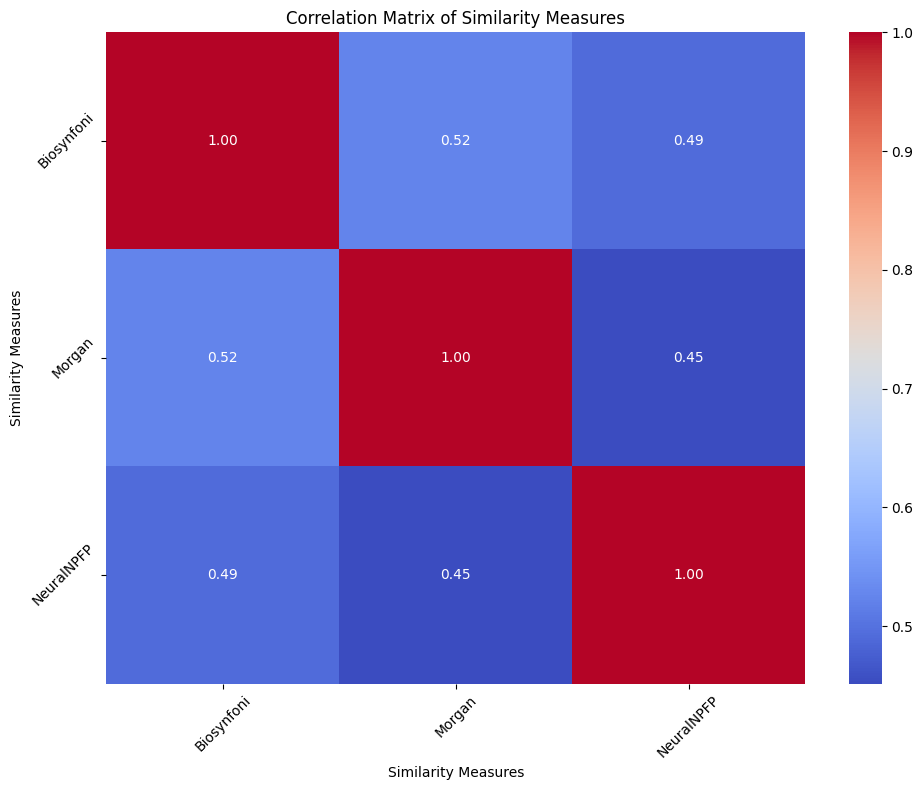

In [39]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Similarity Measures')
plt.xlabel('Similarity Measures')
plt.ylabel('Similarity Measures')
plt.xticks(ticks=np.arange(3) + 0.5, labels=['Biosynfoni', 'Morgan', 'NeuralNPFP'], rotation=45)
plt.yticks(ticks=np.arange(3) + 0.5, labels=['Biosynfoni', 'Morgan', 'NeuralNPFP'], rotation=45)
plt.tight_layout()
plt.show()

In [40]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def generate_mst(similarities_matrix, labels):

    # Step 2: Convert the Correlation Matrix to a Distance Matrix
    distance_matrix = 1 - similarities_matrix

    # Create a graph from the distance matrix
    G = nx.Graph()
    num_nodes = distance_matrix.shape[0]
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i, j])

    # Compute the minimum spanning tree without inversion
    mst_without_inversion = nx.minimum_spanning_tree(G)

    # Set the labels for the nodes in the graph
    for node in mst_without_inversion.nodes():
        if node in labels:
            mst_without_inversion.nodes[node]['label'] = labels[node]
        else:
            mst_without_inversion.nodes[node]['label'] = str(node)

    return mst_without_inversion


# Atualuzações 16/5

In [4]:
def fingerprint_pipeline(dataset, fingerprint_type='NPClassifierFP', sample_size=1000, random_state=42):
    from deepmol.compound_featurization import NPClassifierFP, BiosynfoniFingerprint, NeuralNPFingerprint, MHFPFingerprint
    from sklearn.metrics import pairwise_distances
    from scipy.sparse.csgraph import minimum_spanning_tree
    import pandas as pd
    import numpy as np

    if fingerprint_type == 'NPClassifierFP':
        featurizer = NPClassifierFP(n_jobs=-1)
    elif fingerprint_type == 'Biosynfoni':
        featurizer = BiosynfoniFingerprint()
    elif fingerprint_type == 'NeuralNPFP':
        featurizer = NeuralNPFingerprint()
    elif fingerprint_type == 'MHFP':
        featurizer = MHFPFingerprint()
    else:
        raise ValueError("Fingerprint inválido. Use: 'NPClassifierFP', 'Biosynfoni', 'NeuralNPFP' ou 'MHFP'.")

    sampled = dataset.sample(sample_size, random_state=random_state)
    featurizer.featurize(sampled, inplace=True)
    features = sampled.X

    is_binary = np.array_equal(features, features.astype(bool))
    metric = 'jaccard' if is_binary else 'cosine'
    similarity_matrix = 1 - pairwise_distances(features, metric=metric)

    correlation_matrix = pd.DataFrame(np.corrcoef(features.T))
    distance_matrix = 1 - similarity_matrix
    mst = minimum_spanning_tree(distance_matrix).toarray()

    return correlation_matrix, mst


In [44]:
def fingerprint_pipeline(dataset, fingerprints, labels, random_state=42):
    """
    Aplica uma fingerprint molecular a um subconjunto amostrado de um dataset,
    calcula a matriz de similaridade e correlação entre as moléculas e constrói
    a Minimum Spanning Tree com base na similaridade.

    Parâmetros:
    - dataset: objeto  (e.g. SmilesDataset) com moléculas a processar.
    - fingerprints: classes of featurizers
    - random_state: valor inteiro para garantir reprodutibilidade da amostragem.
    - plot: se True, gera visualizações da matriz de correlação e da MST .

    Output:
    - correlation_matrix: matriz de correlação entre features.
    - mst_graph: grafo NetworkX da Minimum Spanning Tree construída a partir das distâncias.
    """

    # Importações 
    import numpy as np

    similarity_matrices = []
    # Aplicar a fingerprint ao dataset
    for featurizer in fingerprints:
        featurizer.featurize(dataset, inplace=True)

        # Seleciona aleatoriamente as moléculas a utilizar
        np.random.seed(random_state)

        similarities = compute_all_similarities(dataset)
        similarities = normalize_similarity_matrix(similarities)

        similarity_matrices.append(similarities)

    similarities = np.concatenate(similarity_matrices, axis=0)
    correlation_matrix = np.corrcoef(similarities)

    mst = generate_mst(similarities, labels)

    return correlation_matrix, mst


In [45]:
from deepmol.compound_featurization import NPClassifierFP, BiosynfoniKeys, NeuralNPFP, MHFP, MorganFingerprint

cor_matrix, mst = fingerprint_pipeline(
    csv_dataset,                     # O dataset carregado com SMILES
    fingerprints=[NPClassifierFP(), BiosynfoniKeys(), NeuralNPFP(), MHFP(), MorganFingerprint()],
    labels={0: "NPClassifierFP",
            1: "BiosynfoniKeys",
            2: "NeuralNPFP",
            3: "MHFP", 
            4: "MorganFingerprint"
            }
)


Computing similarities: 100%|██████████| 999/999 [00:11<00:00, 85.32it/s] 


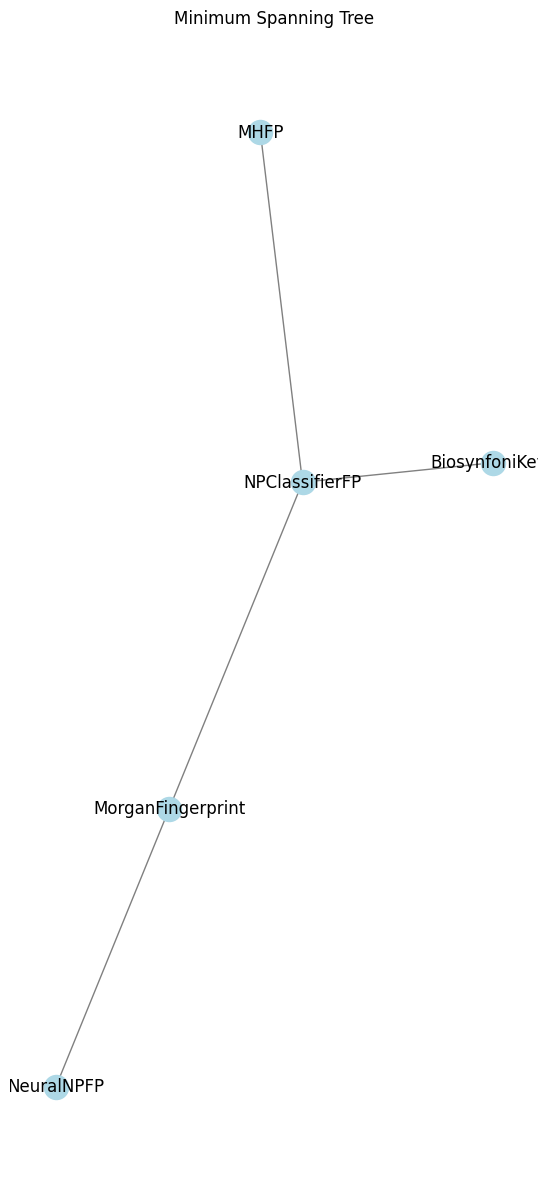

In [53]:
# Draw the graphs
pos_without = nx.spring_layout(mst, weight='weight', k=1.0, iterations=300)

# Extract node labels
node_labels_without = nx.get_node_attributes(mst, 'label')

# Draw the graph without inversion
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
nx.draw(mst, pos_without, with_labels=True, labels=node_labels_without, node_color='lightblue', edge_color='gray')
edge_labels_without = nx.get_edge_attributes(mst, 'weight')
# nx.draw_networkx_edge_labels(mst, pos_without, edge_labels=edge_labels_without)
plt.title("Minimum Spanning Tree")

# Draw the graph with inversion

plt.show()

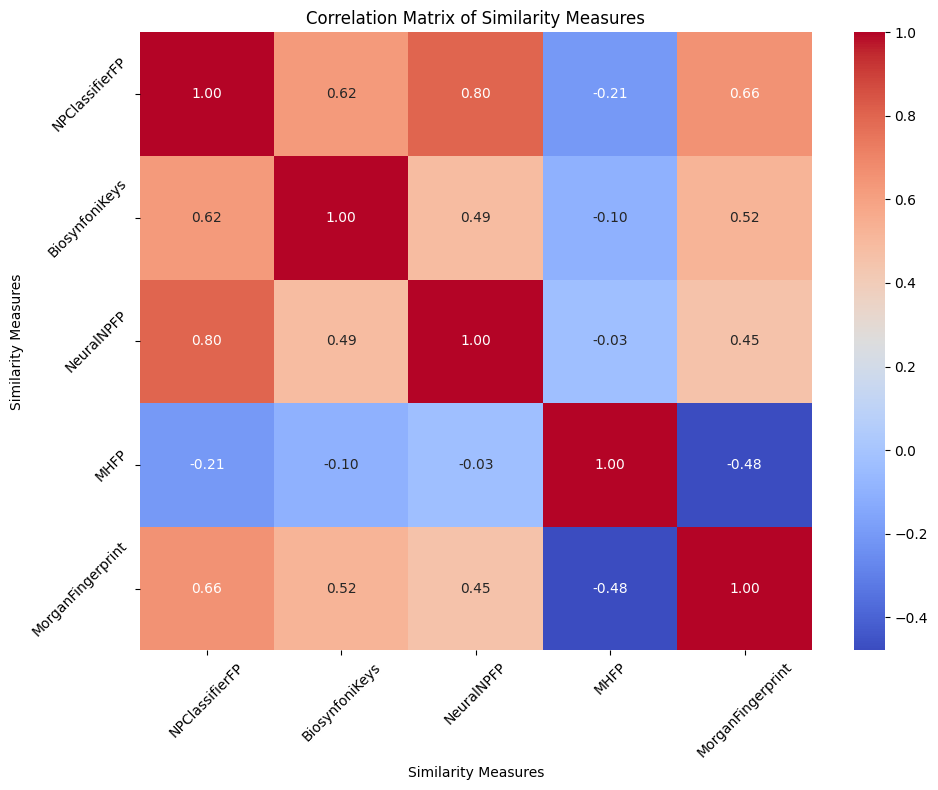

In [51]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels={0: "NPClassifierFP",
            1: "BiosynfoniKeys",
            2: "NeuralNPFP",
            3: "MHFP", 
            4: "MorganFingerprint"
            }

plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Similarity Measures')
plt.xlabel('Similarity Measures')
plt.ylabel('Similarity Measures')
plt.xticks(ticks=np.arange(5) + 0.5, labels=labels.values(), rotation=45)
plt.yticks(ticks=np.arange(5) + 0.5, labels=labels.values(), rotation=45)
plt.tight_layout()
plt.show()